In [1]:
# Name: Gabe Eapen
# UT EID: eapengp
# PS3 - Q1

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets, linear_model
from pandas import DataFrame, Series
import seaborn as sns
sns.set(style='ticks', palette='Set2')

In [3]:
def extract_int(some_string):
    int_as_string = (str(some_string)).split('.')[0]
    return int(int_as_string)

In [4]:
df=pd.read_stata("nes5200_processed_voters_realideo.dta")
df.shape

(41498, 62)

In [5]:
print(df.columns)

Index([u'year', u'resid', u'weight1', u'weight2', u'weight3', u'age',
       u'gender', u'race', u'educ1', u'urban', u'region', u'income', u'occup1',
       u'union', u'religion', u'educ2', u'educ3', u'martial_status', u'occup2',
       u'icpsr_cty', u'fips_cty', u'partyid7', u'partyid3', u'partyid3_b',
       u'str_partyid', u'father_party', u'mother_party', u'dlikes', u'rlikes',
       u'dem_therm', u'rep_therm', u'regis', u'vote', u'regisvote',
       u'presvote', u'presvote_2party', u'presvote_intent', u'ideo_feel',
       u'ideo7', u'ideo', u'cd', u'state', u'inter_pre', u'inter_post',
       u'black', u'female', u'age_sq', u'rep_presvote', u'rep_pres_intent',
       u'south', u'real_ideo', u'presapprov', u'perfin1', u'perfin2',
       u'perfin', u'presadm', u'age_10', u'age_sq_10', u'newfathe', u'newmoth',
       u'parent_party', u'white'],
      dtype='object')


In [6]:
df_1992_raw = df[(df['year'] == 1992.0) & ((df['presvote'] == "1. democrat") | (df['presvote'] == "2. republican"))]
print df_1992_raw.shape
df_ed1992 = df.loc[(df['year'] == 1992.0) & ((df['presvote'] == "1. democrat") | (df['presvote'] == "2. republican"))]
print df_ed1992.shape

(1304, 62)
(1304, 62)


In [7]:
df_vote_inc = pd.DataFrame(df_ed1992,columns=['presvote','income'])
print df_vote_inc.shape
print df_vote_inc.head()
df_clean = df_vote_inc.dropna(how='any')
print df_clean.shape
#print df_clean.dtypes
print df_clean.head()

(1304, 2)
            presvote                  income
32092  2. republican  4. 68 to 95 percentile
32093  2. republican  2. 17 to 33 percentile
32095    1. democrat   1. 0 to 16 percentile
32096  2. republican  2. 17 to 33 percentile
32097    1. democrat  3. 34 to 67 percentile
(1222, 2)
presvote    category
income      category
dtype: object
            presvote                  income
32092  2. republican  4. 68 to 95 percentile
32093  2. republican  2. 17 to 33 percentile
32095    1. democrat   1. 0 to 16 percentile
32096  2. republican  2. 17 to 33 percentile
32097    1. democrat  3. 34 to 67 percentile


In [8]:
cat_columns = df_clean.select_dtypes(['category']).columns
#cat_columns    

In [9]:
df_clean[cat_columns] = df_clean[cat_columns].apply(lambda x: x.cat.codes + 1)
#print vote_D.head()
#df_clean.head()

C:\Anaconda2\lib\site-packages\pandas\core\frame.py:2369: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,presvote,income
32092,2,4
32093,2,2
32095,1,1
32096,2,2
32097,1,3


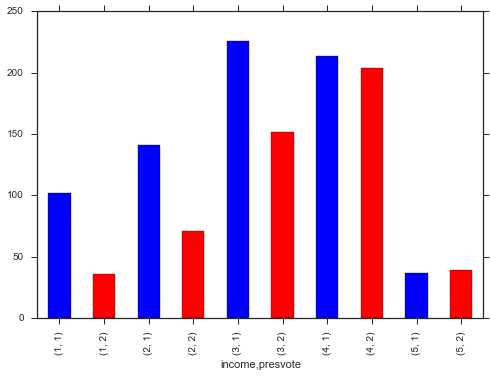

In [10]:
df_clean.groupby(['income','presvote']).size().plot(kind='bar',color=['blue','red'])

In [11]:
vote_D = df_clean.loc[(df_clean['presvote'] == 1) ]
vote_R = df_clean.loc[(df_clean['presvote'] == 2) ]
print vote_D.shape
print vote_R.shape

(720, 2)
(502, 2)


In [13]:
df_clean['presvote'].values

array([2, 2, 1, ..., 2, 1, 2], dtype=int8)

In [14]:
X = df_clean['income'].values
Y = df_clean['presvote'].values
# Reshape as X has only single feature
#X.reshape(-1, 1)
print X.shape
print Y.shape
# create the logistic regression object
logreg = linear_model.LogisticRegression(fit_intercept=True,solver='liblinear',penalty='l1')
logreg.fit(X.reshape(-1, 1), Y)

(1222L,)
(1222L,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
print "Coeff:",logreg.coef_
print "Intercept (B0)",logreg.intercept_

Coeff: [[ 0.29072854]]
Intercept (B0) [-1.25875036]


In [56]:
# Part C #

In [57]:
print "Probability for Republican Inc level 2", logreg.predict_proba(2)[0][1]
print "Probability for Republican Inc level 3", logreg.predict_proba(3)[0][1]

Probability for Republican Inc level 2 0.336865682301
Probability for Republican Inc level 3 0.404544542996


In [58]:
XRepInc_2 = vote_R.loc[(vote_R['income'] == 2) ].values
XRepInc_3 = vote_R.loc[(vote_R['income'] == 3) ].values


In [63]:
print logreg.predict_proba(XRepInc_2.reshape(-1,1))

[[ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 [ 0.66313432  0.33686568]
 

In [64]:
print logreg.predict_proba(XRepInc_3.reshape(-1,1))

[[ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 [ 0.59545546  0.40454454]
 [ 0.66313432  0.33686568]
 